## IRIS Flower Classfication

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np

## 1. Import the data

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
#display first 5 rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 2. splitting the data into train and test

In [7]:
y = data['Species'].values
x = data.drop(['Species'],axis=1)
x = x.drop(['Id'],axis=1)

In [8]:
#since, y is categorical feature. Hence, converting it to numerical feature
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_ohe = encoder.fit_transform(y)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_ohe, test_size=0.33, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


## 3. Modelling

### 3.1. k- Nearest Neighbour

In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf_1 = KNeighborsClassifier(n_neighbors=5)

clf_1.fit(x_train.iloc[:,0:2], y_train)

y_pred_1 = clf_1.predict(x_test.iloc[:,0:2])

### 3.2. Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

clf_2 = GaussianNB()

clf_2.fit(x_train,y_train)

y_pred_2 = clf_2.predict(x_test)

### 3.3. Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

clf_3 = LogisticRegression()

clf_3.fit(x_train, y_train)

y_pred_3 = clf_3.predict(x_test)

### 3.4. Support Vector Machine

In [13]:
from sklearn.svm import SVC

clf_4 = SVC()

clf_4.fit(x_train, y_train)

y_pred_4 = clf_4.predict(x_test)

### 3.5. Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier

clf_5 = DecisionTreeClassifier()

clf_5.fit(x_train, y_train)

y_pred_5 = clf_5.predict(x_test)

## 4. Results

### 4.1. Accuracy

In [15]:
from sklearn.metrics import accuracy_score

accuracy_1 = accuracy_score(y_test,y_pred_1)
accuracy_2 = accuracy_score(y_test,y_pred_2)
accuracy_3 = accuracy_score(y_test,y_pred_3)
accuracy_4 = accuracy_score(y_test,y_pred_4)
accuracy_5 = accuracy_score(y_test,y_pred_5)

print("KNN Accuracy = ",accuracy_1)
print("Naive Bayes Accuracy = ",accuracy_2)
print("Logistic Regression Accuracy = ",accuracy_3)
print("SVM Accuracy = ",accuracy_4)
print("Decision Trees Accuracy = ",accuracy_5)

KNN Accuracy =  0.8
Naive Bayes Accuracy =  0.96
Logistic Regression Accuracy =  1.0
SVM Accuracy =  1.0
Decision Trees Accuracy =  0.96


### 4.2. Confusion Matrix

### 4.2.1. Naive Bayes Algorithm

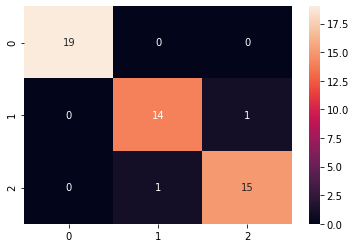

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm_2, annot=True)
plt.show()

### 4.2.2. Logistic Regression

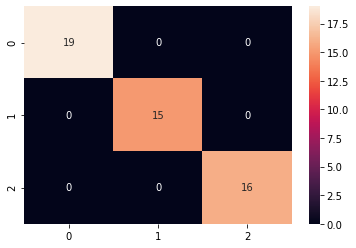

In [22]:
cm_3 = confusion_matrix(y_test, y_pred_3)
sns.heatmap(cm_3, annot=True)
plt.show()

## 5. Visualization

### 5.1. K-NN

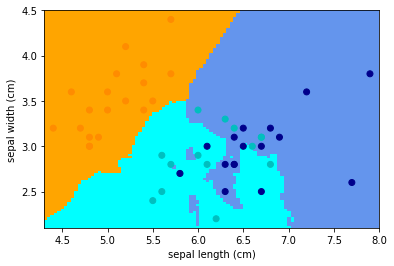

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

x_min, x_max = x_test['SepalLengthCm'].min() - .1, x_test['SepalLengthCm'].max() + .1
y_min, y_max = x_test['SepalWidthCm'].min() - .1, x_test['SepalWidthCm'].max() + .1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = clf_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(x_test['SepalLengthCm'], x_test['SepalWidthCm'], c = y_test,cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## 6. Summary

In [18]:
from texttable import Texttable
t = Texttable()
t.add_rows([['Model', 'Accuracy'], ['K-NN',0.98],['Naive Bayes',0.96],['Logistic Regression',1.0],
           ['SVM',1.0],['Decision Trees',1.0]])
print(t.draw())

+---------------------+----------+
|        Model        | Accuracy |
+=====================+==========+
| K-NN                | 0.980    |
+---------------------+----------+
| Naive Bayes         | 0.960    |
+---------------------+----------+
| Logistic Regression | 1        |
+---------------------+----------+
| SVM                 | 1        |
+---------------------+----------+
| Decision Trees      | 1        |
+---------------------+----------+
